# Generate plots and tables with SampCompDB

`SampComp` creates a python object database (shelve DBM) containing the statistical analysis results. The API directly returns a `SampCompDB` object wrapping the shelve DB. It is also possible to reload the `SampCompDB` latter using the db file path prefix. `SampCompDB` also need a FASTA file to get the corresponding reference id sequence and accept an optional BED file containing genomic annotations. SampCompDB provide a large selection of simple high level function to plot and export the results.

At the moment `SampCompDB` is only accessible through the python API.

## Import the package

In [32]:
from nanocompore.SampCompDB import SampCompDB, jhelp

## Load the database with SampCompDB

In [33]:
jhelp (SampCompDB)

**SampCompDB** (db_fn, fasta_fn, bed_fn, run_type, log_level)

Wrapper over the result shelve SampComp 

---

* **db_fn** (required) [str]

Path to a database file previously created with SampComp

* **fasta_fn** (required) [str]

Path to a fasta file corresponding to the reference used for read alignemnt

* **bed_fn** (default: None) [str]

Path to a BED file containing the annotation of the transcriptome used as reference when mapping

* **run_type** (default: RNA) [str]

Define the run type model to import {RNA, DNA}

* **log_level** (default: info) [str]

Set the log level. {warning,info,debug}"



### Basic initialisation

In [11]:
# Load database
db = SampCompDB (
    db_fn = "results/simulated_SampComp.db",
    fasta_fn = "references/simulated/ref.fa")

# Print general metadata information
print (db)

# Prit list of references containing valid data
print (db.ref_id_list)

Loading SampCompDB
Calculate results


[SampCompDB]
	package_name: nanocompore
	package_version: 1.0.0rc3-dev
	timestamp: 2019-06-19 14:11:42.582069
	comparison_methods: ['GMM', 'KS']
	pvalue_tests: ['GMM_anova_pvalue', 'KS_dwell_pvalue', 'KS_intensity_pvalue']
	sequence_context: 0
	min_coverage: 30
	n_samples: 4
	Number of references: 5

['ref_0002', 'ref_0000', 'ref_0003', 'ref_0001', 'ref_0004']


## Generate text reports

`SampCompDB` can generate 3 types of text reports:
* Tabulated statistics => **`save_report`**
* Tabulated intensity and dwell values per conditions => **`save_shift_stats`**
* BED significant genomic positions =>  **`save_to_bed`**

In addition, we also conveniently wrapped all 3 methods in **`save_all`**.

### save_report

In [34]:
jhelp(SampCompDB.save_report)

**save_report** (output_fn)

Saves a tabulated text dump of the database containing all the statistical results for all the positions

---

* **output_fn** (default: None) [str]

Path to file where to write the data. If None, data is returned to the standard output.



In [13]:
# Reload DB
db = SampCompDB (db_fn = "results/simulated_SampComp.db", fasta_fn = "references/simulated/ref.fa", log_level="warning")

# Save report
db.save_report (output_fn="./results/simulated_report.tsv")

# Visualise first lines
!head "./results/simulated_report.tsv"

pos	chr	genomicPos	ref_id	strand	ref_kmer	GMM_anova_pvalue	KS_dwell_pvalue	KS_intensity_pvalue	GMM_cov_type	GMM_n_clust	cluster_counts	Anova_delta_logit
0	NA	NA	ref_0002	NA	AAGGA	0.010390555392639545	3.7826176625121133e-28	7.372203704353806e-13	full	2	Modified_rep1:4/51__Modified_rep2:4/56__Unmodified_rep1:39/16__Unmodified_rep2:49/11	-3.5291008135000004
1	NA	NA	ref_0002	NA	AGGAC	0.018531016868604602	5.021033530354203e-38	2.6192924303287954e-32	full	2	Modified_rep1:49/6__Modified_rep2:54/6__Unmodified_rep1:0/55__Unmodified_rep2:3/57	5.363518116
2	NA	NA	ref_0002	NA	GGACT	0.016650130591381845	9.083535018319583e-23	1.9347009060981327e-19	full	2	Modified_rep1:48/7__Modified_rep2:53/7__Unmodified_rep1:13/42__Unmodified_rep2:7/53	3.3768032759999995
3	NA	NA	ref_0002	NA	GACTG	nan	1.5167780008574906e-20	5.038173683218352e-10	full	1	NC	nan
4	NA	NA	ref_0002	NA	ACTGC	nan	0.7103128384794648	0.2143969244232542	full	1	NC	nan
5	NA	NA	ref_0002	NA	CTGCG	nan	0.5427546298577994	0.9441367354284554	full	1	N

### save_shift_stats

In [35]:
jhelp(SampCompDB.save_shift_stats)

**save_shift_stats** (output_fn)

Save the mean, median and sd intensity and dwell time for each condition and for each position.
This can be used to evaluate the intensity of the shift for significant positions.

---

* **output_fn** (default: None)

Path to file where to write the data. If None, data is returned to the standard output.



In [15]:
# Reload DB
db = SampCompDB (db_fn = "results/simulated_SampComp.db", fasta_fn = "references/simulated/ref.fa", log_level="warning")

# Save report
db.save_shift_stats (output_fn="./results/simulated_shift.tsv")

# Visualise first lines
!head "./results/simulated_shift.tsv"

red_if	pos	c1_mean_intensity	c2_mean_intensity	c1_median_intensity	c2_median_intensity	c1_sd_intensity	c2_sd_intensity	c1_mean_dwell	c2_mean_dwell	c1_median_dwell	c2_median_dwell	c1_sd_dwell	c2_sd_dwell
ref_0001	0	99.31924275131445	95.20865205128713	99.30450652082747	95.48506067828346	3.4542546529463602	3.2457394860292355	0.02892371350987724	0.011492822977360408	0.026110578053659444	0.008409393806440126	0.012309163786594407	0.010097740816656625
ref_0001	1	95.8472415436861	86.76320109231014	96.51658647295791	86.5897261563199	4.818212253968896	3.462616900325914	0.049904028745349535	0.014284063287085003	0.049430992173562574	0.00838888597355578	0.01891436186841055	0.01469932192592977
ref_0001	2	99.95956311201668	91.94076655256666	99.2359574515384	91.66515374416255	6.732308978957026	5.022072514781664	0.027605907187015038	0.013686251128416578	0.024211963436724607	0.009798007086063236	0.014206789096974112	0.01220646673010648
ref_0001	3	123.38251652061109	120.39646776876853	123.6421269382127	1

### save_to_bed

In [36]:
jhelp(SampCompDB.save_to_bed)

**save_to_bed** (output_fn, bedgraph, pvalue_field, pvalue_thr, span, convert, assembly, title)

Save the position of significant positions in the genome space in BED6 or BEDGRAPH format.
The resulting file can be used in a genome browser to visualise significant genomic locations.
The option is only available if `SampCompDB` if initialised with a BED file containing genome annotations.

---

* **output_fn** (default: None)

Path to file where to write the data

* **bedgraph** (default: False)

save file in bedgraph format instead of bed

* **pvalue_field** (default: None)

specifies what column to use as BED score (field 5, as -log10)

* **pvalue_thr** (default: 0.01)

only report positions with pvalue<=thr

* **span** (default: 5)

The size of each BED feature. If size=5 (default) features correspond to kmers. If size=1 features correspond to the first base of each kmer.

* **convert** (default: None)

one of 'ensembl_to_ucsc' or 'ucsc_to_ensembl". Convert chromosome named between Ensembl and Ucsc conventions

* **assembly** (default: None)

required if convert is used. One of "hg38" or "mm10"

* **title** (default: None)



In [ ]:
# Reload DB
db = SampCompDB (db_fn = "results/simulated_SampComp.db", fasta_fn = "references/simulated/ref.fa", bed_fn="references/simulated/annot.bed", log_level="warning")

# Save report
db.save_to_bed (output_fn="./results/simulated_sig_positions.bed")

# Visualise first lines
!head "./results/simulated_sig_positions.bed"

## Generate plots

`SampCompDB` comes with a range of methods to visualise the data and explore candidates.

* **`plot_pvalue`**: Plot the `-log(10)` of the pvalues obtained for all the statistical methods at reference level
* **`plot_signal`**: Generate comparative plots of both median intensity and dwell time for each condition at read level 
* **`plot_coverage`**: Plot the read coverage over a reference for all samples analysed 
* **`plot_kmers_stats`**: Fancy version of `plot_coverage` that also report missing, mismatching and undefined kmers status from Nanopolish 
* **`plot_position`**: Allow to visualise the distribution of intensity and dwell time in 2D for a single position


### Extra imports for the plotting library

Matplotlib is required to use the ploting methods in Jupyter 

In [37]:
import matplotlib.pyplot as pl
%matplotlib inline

### plot_pvalue

In [38]:
jhelp(SampCompDB.plot_pvalue)

**plot_pvalue** (ref_id, start, end, kind, threshold, figsize, palette, plot_style, tests)

Plot pvalues per position (by default plot all fields starting by "pvalue")

---

* **ref_id** (required) [str]

Valid reference id name in the database

* **start** (default: None) [int]

Start coordinate

* **end** (default: None) [int]

End coordinate (included)

* **kind** (default: lineplot) [str]

kind of plot to represent the data. {lineplot,barplot}

* **threshold** (default: 0.01) [float]

* **figsize** (default: (30, 10)) [tuple]

Length and heigh of the output plot

* **palette** (default: Set2) [str]

Colormap. See https://matplotlib.org/users/colormaps.html, https://matplotlib.org/examples/color/named_colors.html

* **plot_style** (default: ggplot) [str]

Matplotlib plotting style. See https://matplotlib.org/users/style_sheets.html

* **tests** (default: None) [str]

Limit the pvalue methods shown in the plot. Either a list of methods or a string coresponding to a part of the name



#### Examples from simulated dataset

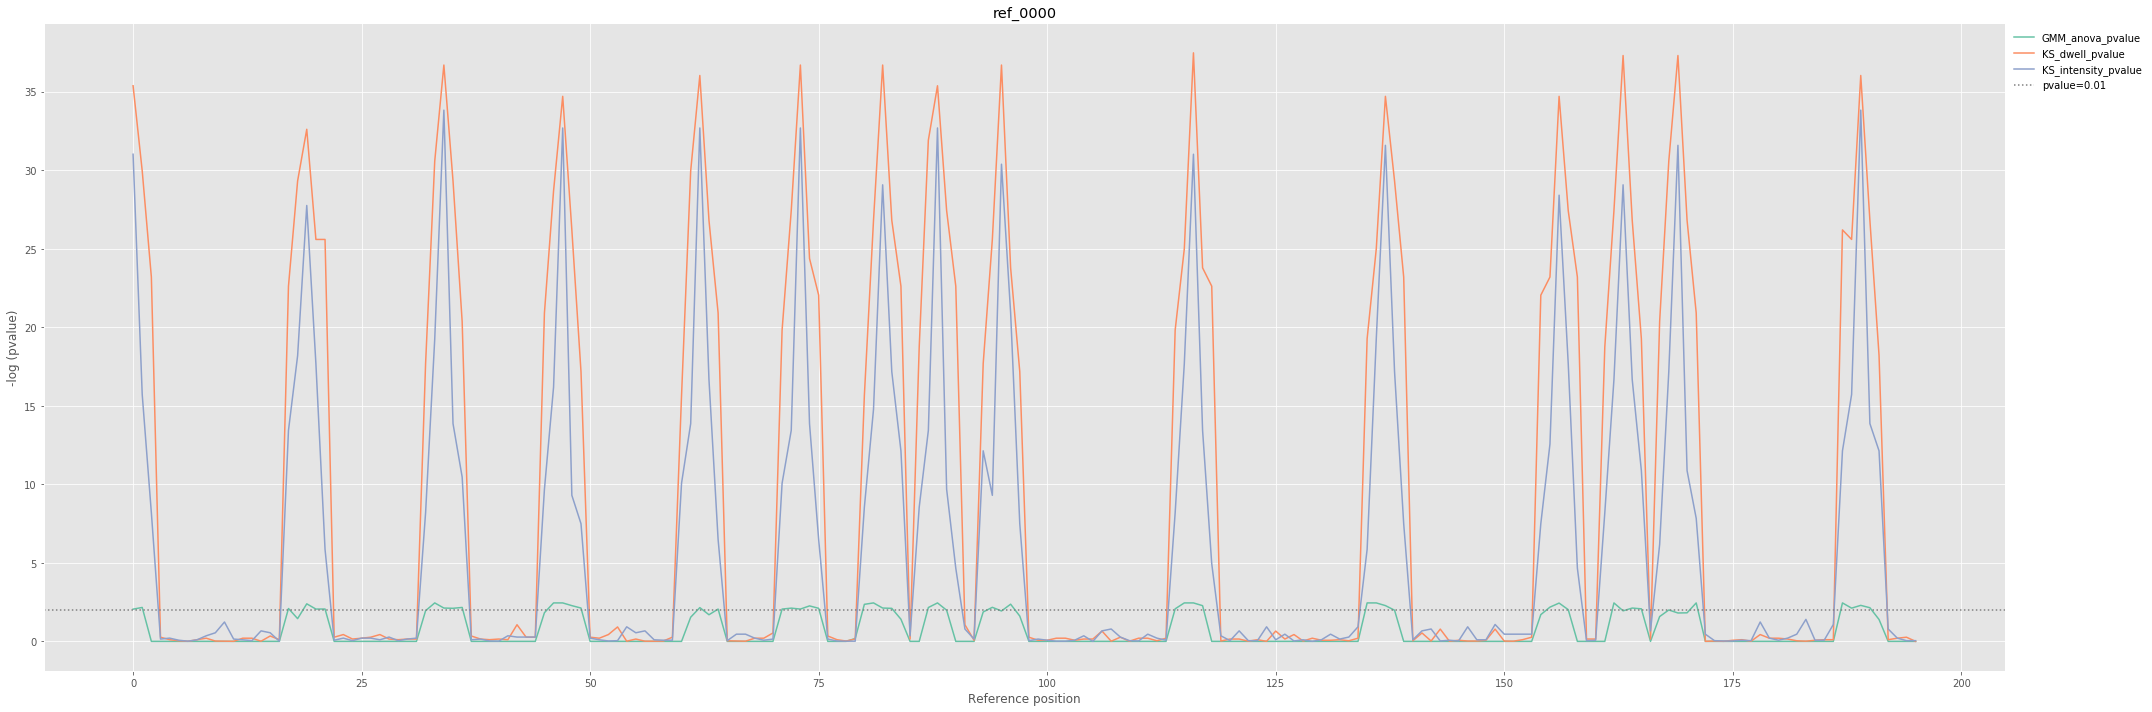

In [19]:
# Reload DB
db = SampCompDB (db_fn = "results/simulated_SampComp.db", fasta_fn = "references/simulated/ref.fa", log_level="warning")
# Plot
fig, ax = db.plot_pvalue ("ref_0000")

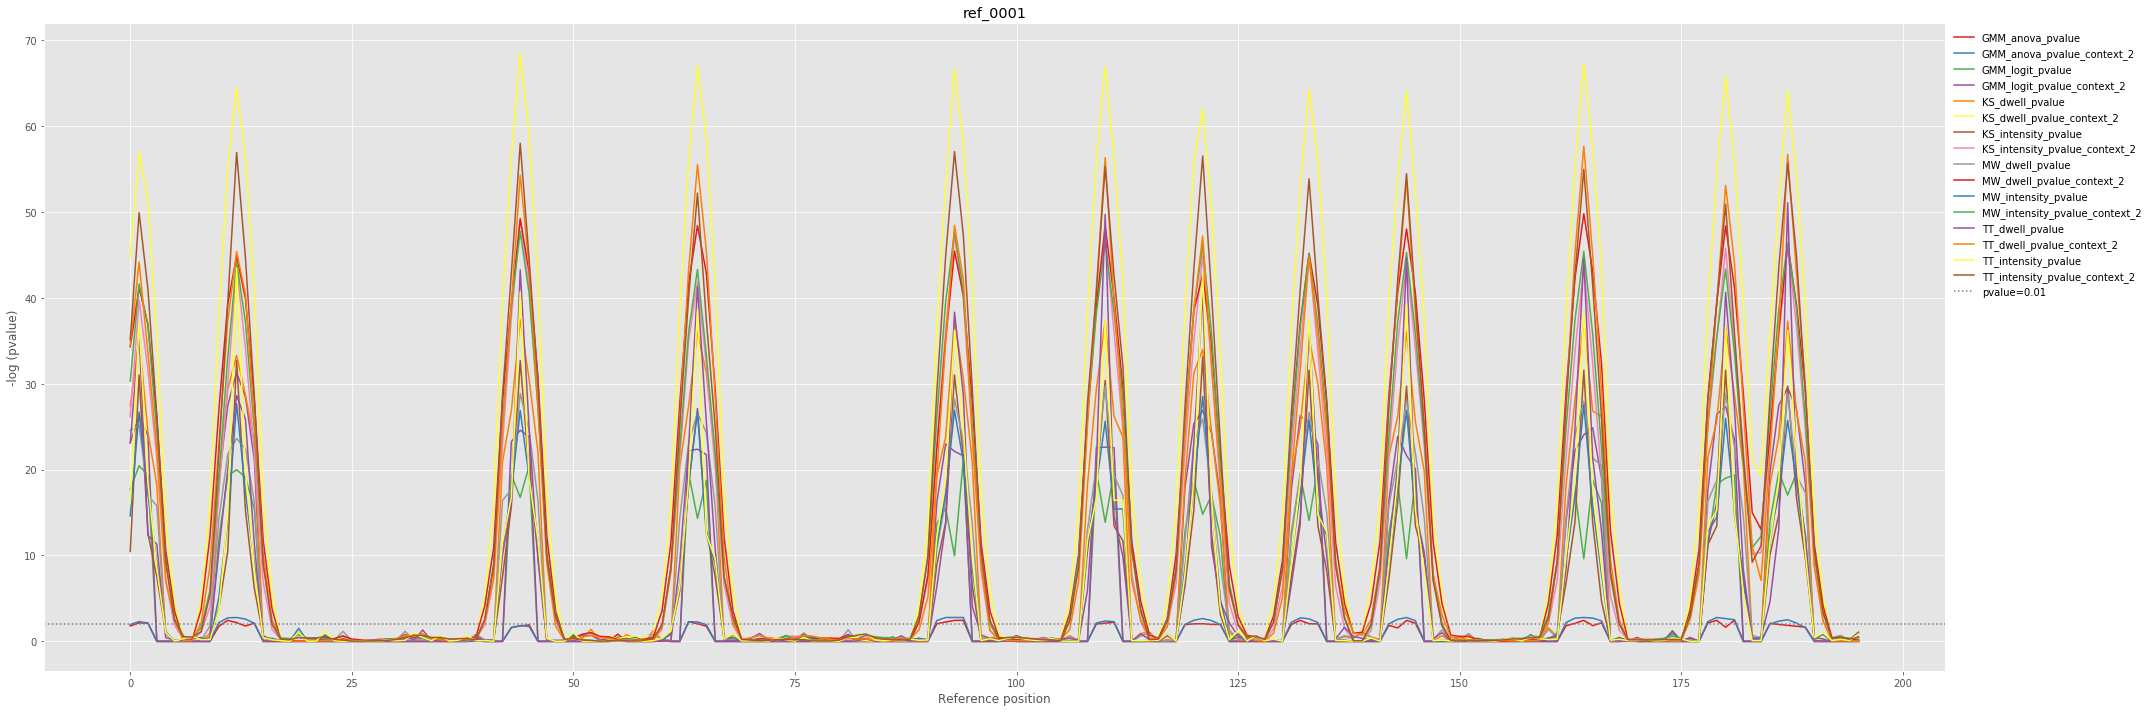

In [20]:
# Reload DB
db = SampCompDB (db_fn = "results/simulated_stats_SampComp.db", fasta_fn = "references/simulated/ref.fa", log_level="warning")
# Plot
fig, ax = db.plot_pvalue ("ref_0001", palette="Set1")

#### Example from real yeast dataset with extended sequence context

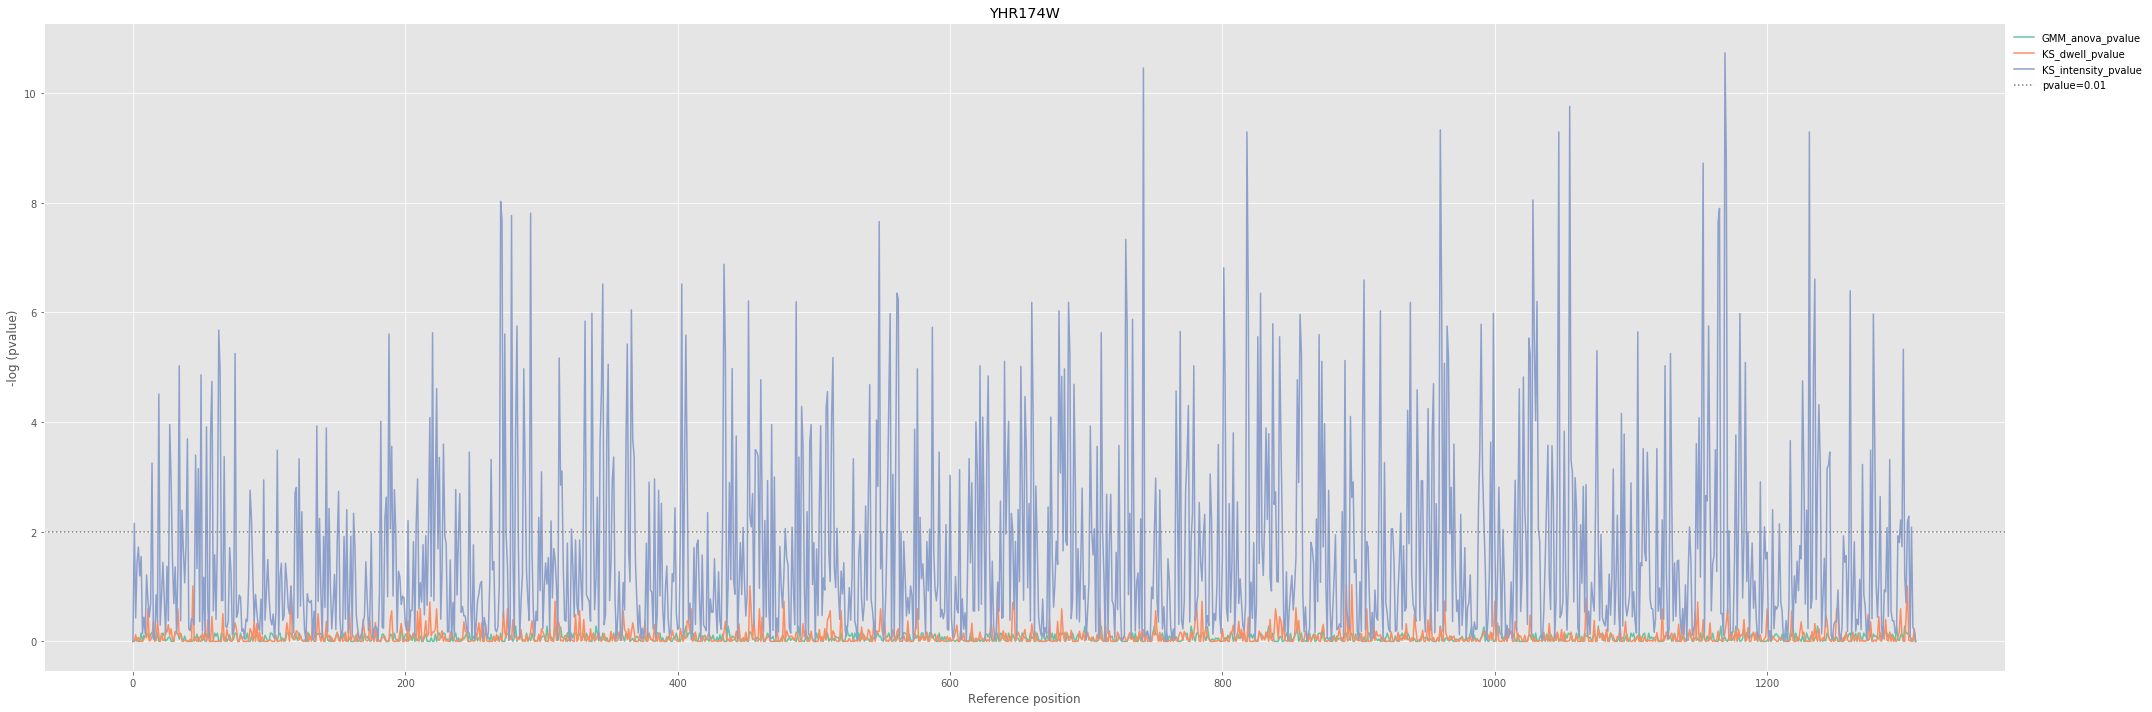

In [21]:
# Reload DB
db = SampCompDB (db_fn = "results/yeast_SampComp.db", fasta_fn = "references/yeast/Yeast_transcriptome.fa", log_level="warning")
# Plot
fig, ax = db.plot_pvalue ("YHR174W")

### plot_signal

In [39]:
jhelp(SampCompDB.plot_signal)

**plot_signal** (ref_id, start, end, kind, split_samples, figsize, palette, plot_style)

Plot the dwell time and median intensity distribution position per position
Pointless for more than 50 positions at once as it becomes hard to distinguish

---

* **ref_id** (required) [str]

Valid reference id name in the database

* **start** (default: None) [int]

Start coordinate

* **end** (default: None) [int]

End coordinate (included)

* **kind** (default: violinplot) [str]

Kind of plot {violinplot, boxenplot, swarmplot}

* **split_samples** (default: False) [bool]

If samples for a same condition are represented separatly. If false they are merged per condition

* **figsize** (default: (30, 10)) [tuple]

Length and heigh of the output plot

* **palette** (default: Set2) [str]

Colormap. See https://matplotlib.org/users/colormaps.html, https://matplotlib.org/examples/color/named_colors.html

* **plot_style** (default: ggplot) [str]

Matplotlib plotting style. See https://matplotlib.org/users/style_sheets.html



#### Examples from simulated dataset

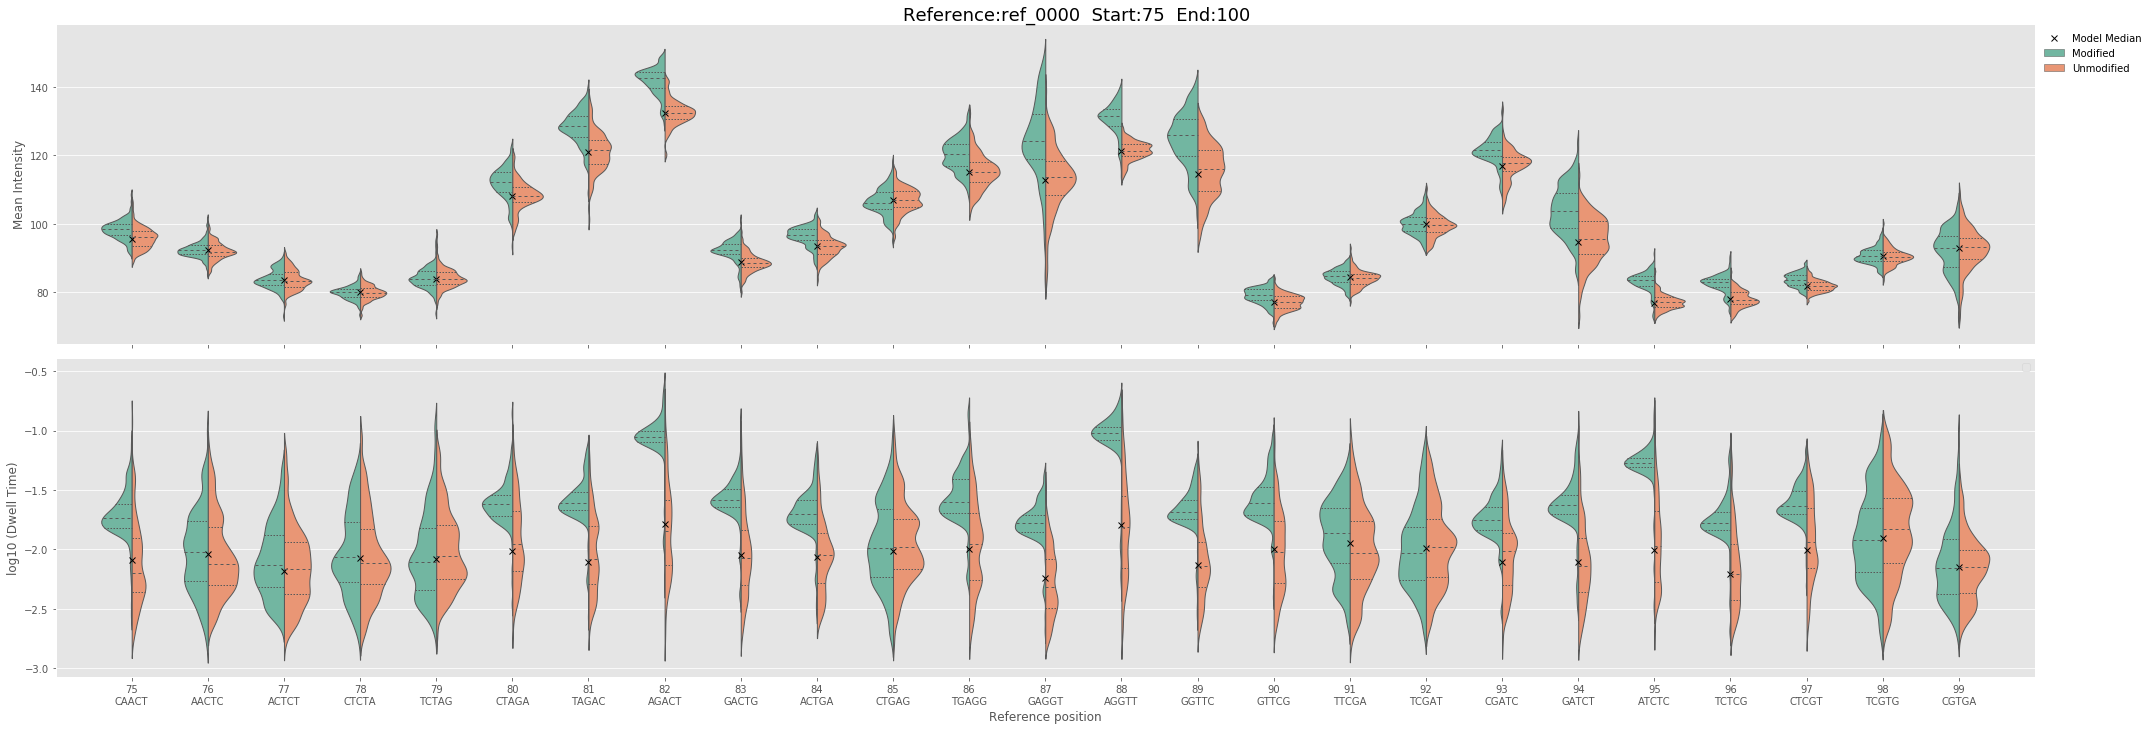

In [23]:
# Reload DB
db = SampCompDB (db_fn = "results/simulated_SampComp.db", fasta_fn = "references/simulated/ref.fa", log_level="warning")
# Plot
fig, ax = db.plot_signal ("ref_0000", start=75, end=100)

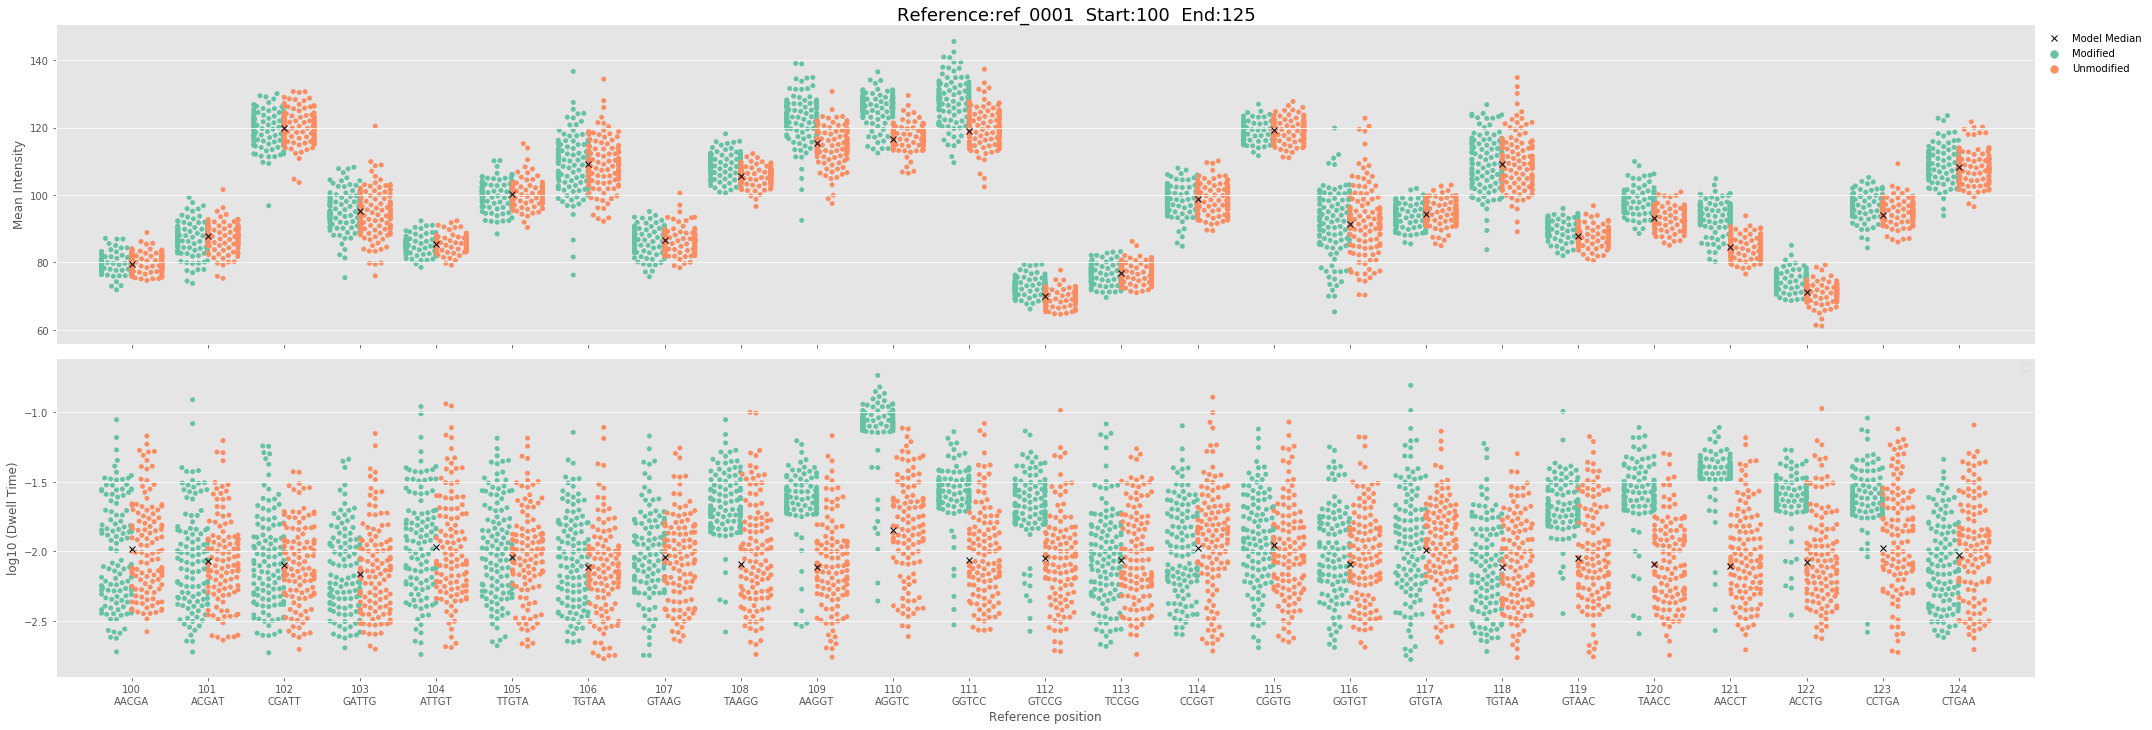

In [24]:
# Reload DB
db = SampCompDB (db_fn = "results/simulated_SampComp.db", fasta_fn = "references/simulated/ref.fa", log_level="warning")
# Plot
fig, ax = db.plot_signal ("ref_0001", start=100, end=125, kind="swarmplot")

#### Example from real yeast dataset

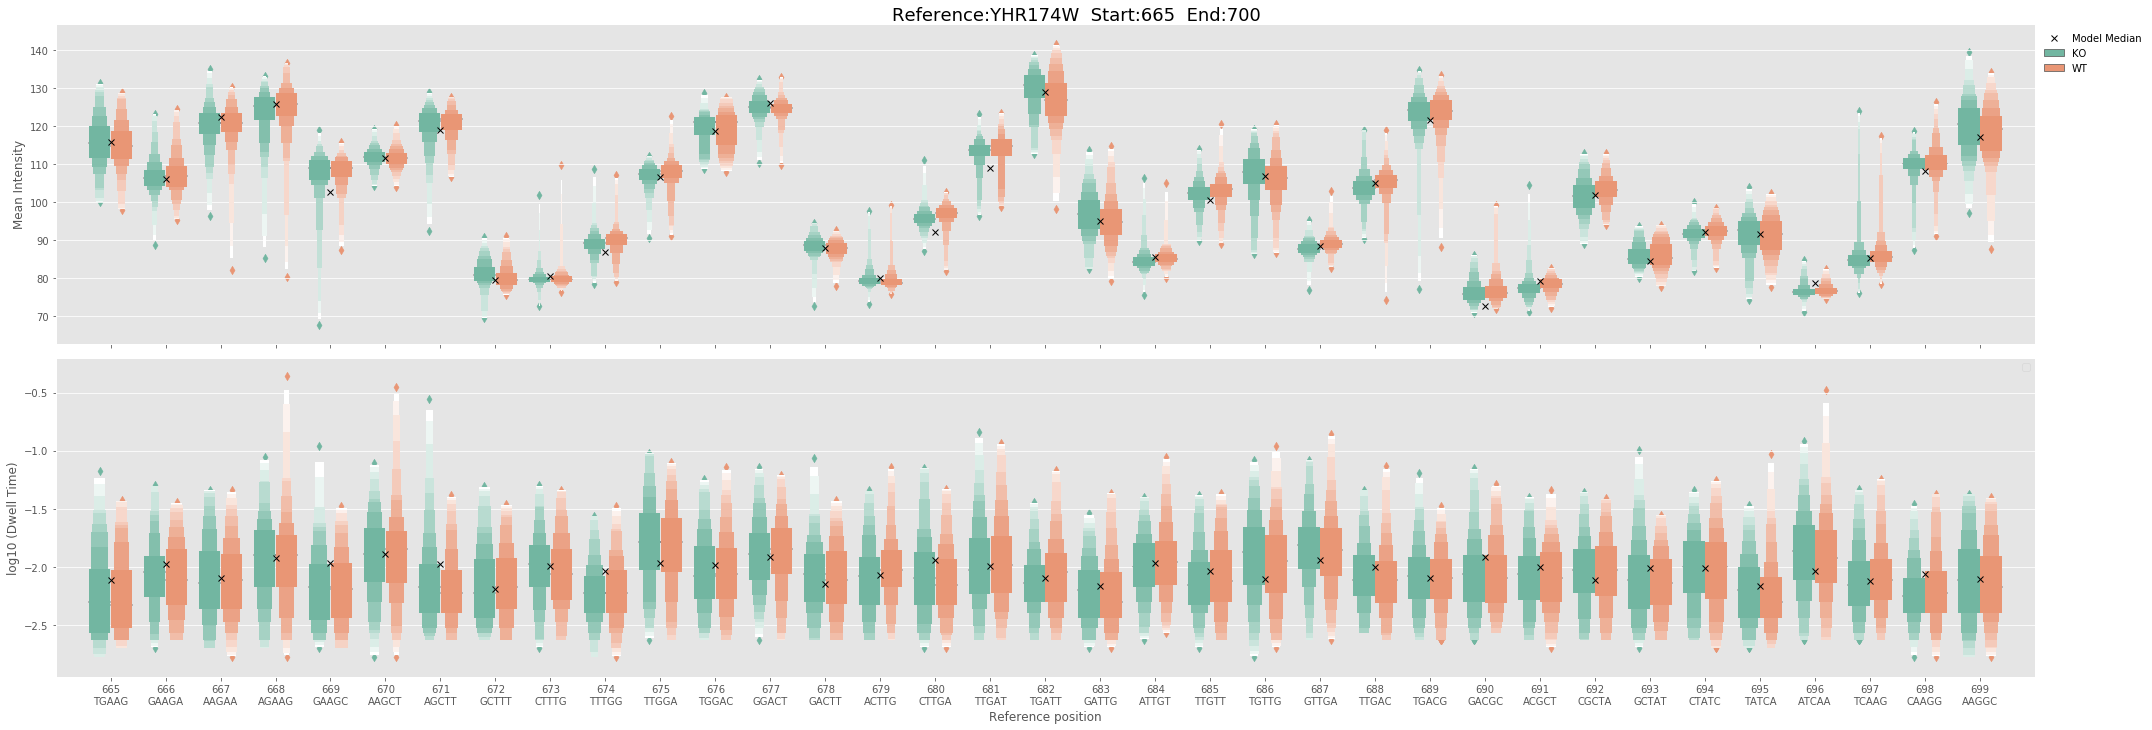

In [25]:
# Reload DB
db = SampCompDB (db_fn = "results/yeast_SampComp.db", fasta_fn = "references/yeast/Yeast_transcriptome.fa", log_level="warning")
# Plot
fig, ax = db.plot_signal ("YHR174W", start=665, end=700, kind="boxenplot")

### plot_coverage

In [26]:
jhelp(SampCompDB.plot_coverage)

**plot_coverage** (ref_id, start, end, scale, split_samples, figsize, palette, plot_style)

Plot the read coverage over a reference for all samples analysed

---

* **ref_id** (required) [str]

Valid reference id name in the database

* **start** (default: None) [int]

Start coordinate

* **end** (default: None) [int]

End coordinate (included)

* **scale** (default: False) [bool]

* **split_samples** (default: False) [bool]

* **figsize** (default: (30, 5)) [tuple]

Length and heigh of the output plot

* **palette** (default: Set2) [str]

Colormap. See https://matplotlib.org/users/colormaps.html, https://matplotlib.org/examples/color/named_colors.html

* **plot_style** (default: ggplot) [str]

Matplotlib plotting style. See https://matplotlib.org/users/style_sheets.html



#### Example from real yeast dataset

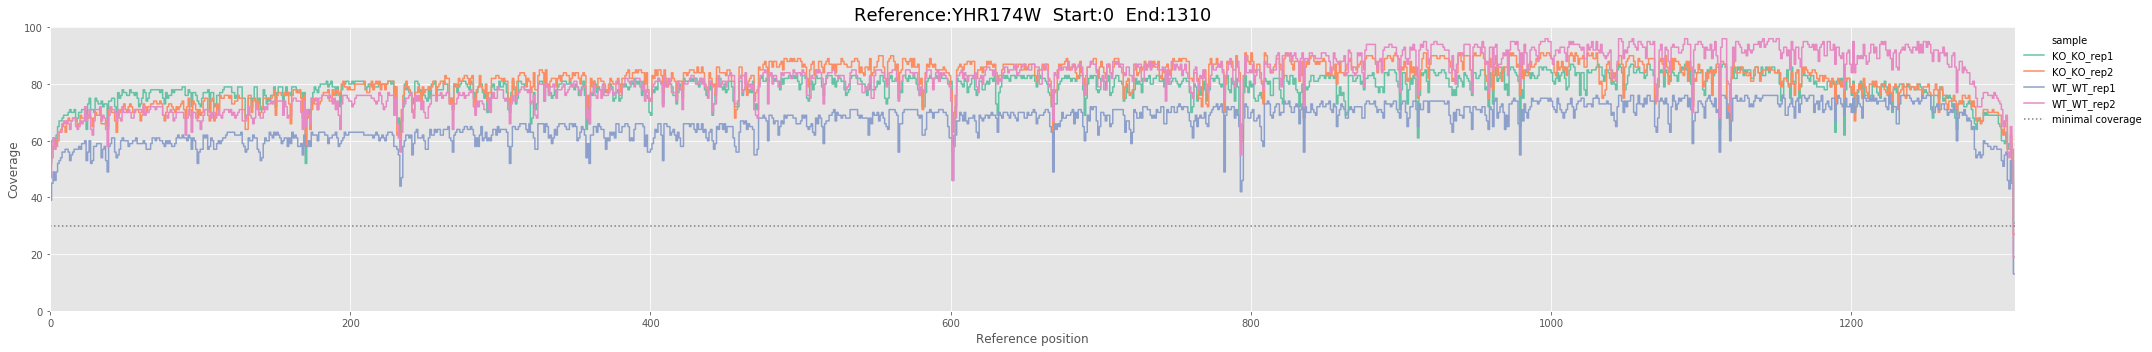

In [27]:
# Reload DB
db = SampCompDB (db_fn = "results/yeast_SampComp.db", fasta_fn = "references/yeast/Yeast_transcriptome.fa", log_level="warning")
# Plot
fig, ax = db.plot_coverage ("YHR174W")

### plot_kmers_stats

In [28]:
jhelp(SampCompDB.plot_kmers_stats)

**plot_kmers_stats** (ref_id, start, end, split_samples, figsize, palette, plot_style)

Fancy version of `plot_coverage` that also report missing, mismatching and undefined kmers status from Nanopolish

---

* **ref_id** (required) [str]

Valid reference id name in the database

* **start** (default: None) [int]

Start coordinate

* **end** (default: None) [int]

End coordinate (included)

* **split_samples** (default: False) [bool]

* **figsize** (default: (30, 10)) [tuple]

Length and heigh of the output plot

* **palette** (default: Accent) [str]

Colormap. See https://matplotlib.org/users/colormaps.html, https://matplotlib.org/examples/color/named_colors.html

* **plot_style** (default: ggplot) [str]

Matplotlib plotting style. See https://matplotlib.org/users/style_sheets.html



#### Example from real yeast dataset

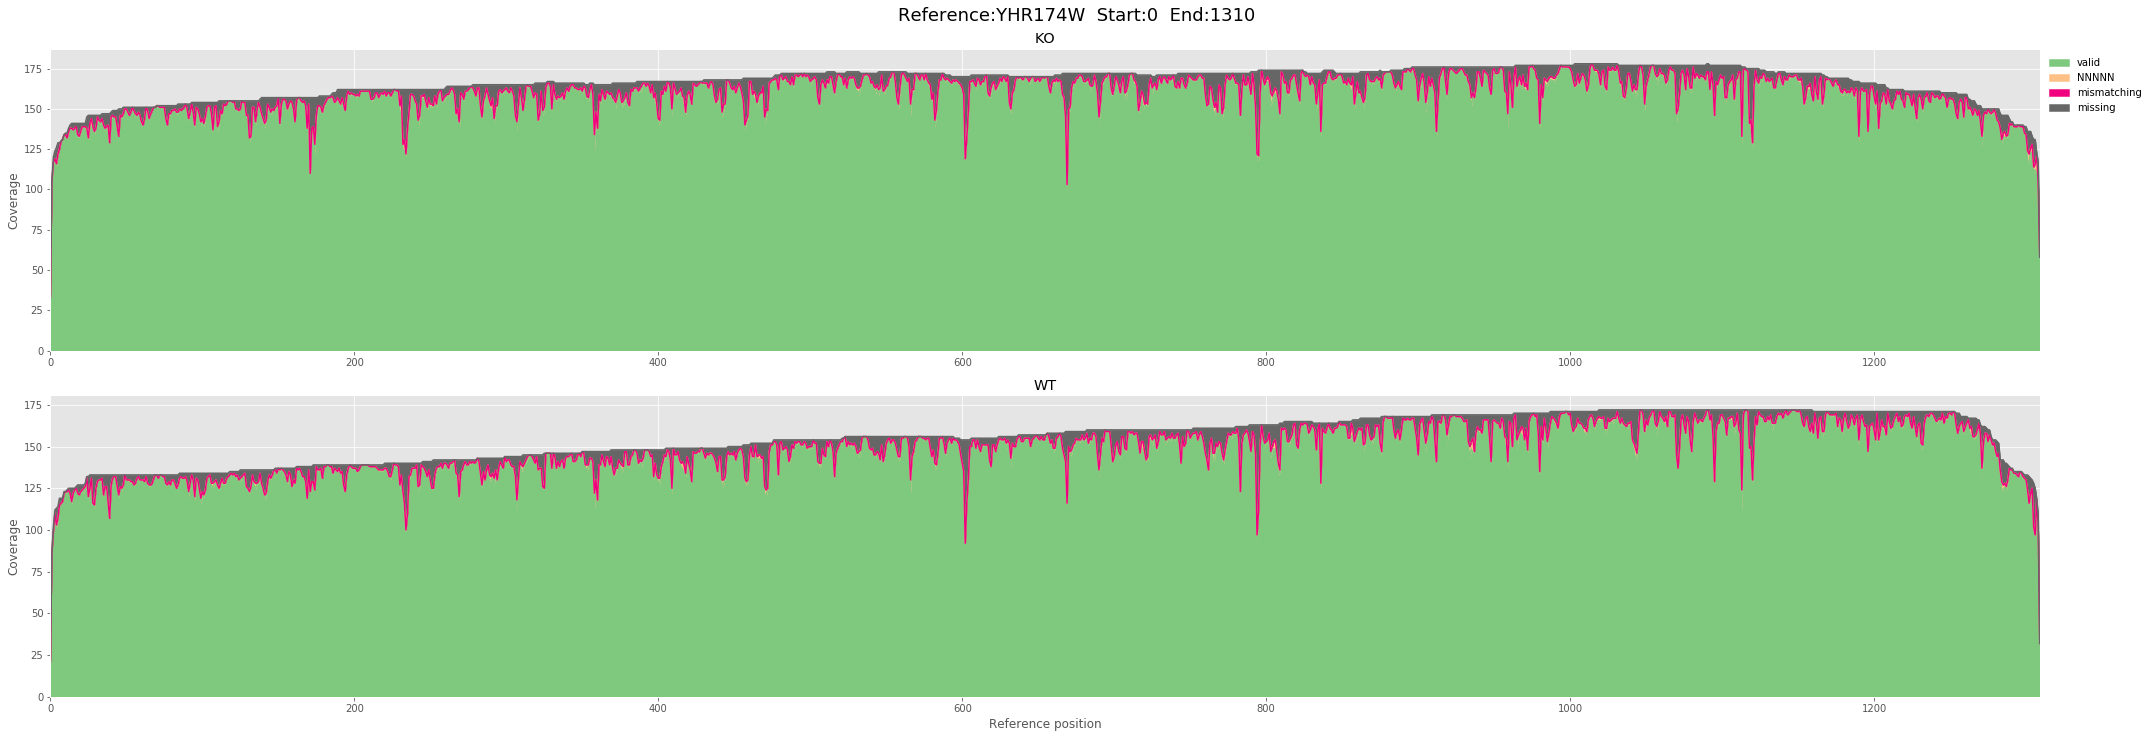

In [29]:
# Reload DB
db = SampCompDB (db_fn = "results/yeast_SampComp.db", fasta_fn = "references/yeast/Yeast_transcriptome.fa", log_level="warning")
# Plot
fig, ax = db.plot_kmers_stats ("YHR174W")

### plot_position 

In [30]:
jhelp(SampCompDB.plot_position)

**plot_position** (ref_id, pos, split_samples, figsize, palette, plot_style, xlim, ylim, alpha, pointSize, scatter, kde, model, gmm_levels)

Plot the dwell time and median intensity at the given position as a scatter plot.

---

* **ref_id** (required) [str]

Valid reference id name in the database

* **pos** (default: None) [int]

Position of interest

* **split_samples** (default: False) [bool]

If True, samples for a same condition are represented separately. If False, they are merged per condition

* **figsize** (default: (30, 10)) [tuple]

Length and heigh of the output plot

* **palette** (default: Set2) [str]

Colormap. See https://matplotlib.org/users/colormaps.html, https://matplotlib.org/examples/color/named_colors.html

* **plot_style** (default: ggplot) [str]

Matplotlib plotting style. See https://matplotlib.org/users/style_sheets.html

* **xlim** (default: (None, None)) [tuple]

A tuple of explicit limits for the x axis

* **ylim** (default: (None, None)) [tuple]

A tuple of explicit limits for the y axis

* **alpha** (default: 0.3) [float]

* **pointSize** (default: 20) [int]

int specifying the point size for the scatter plot

* **scatter** (default: True) [bool]

if True, plot the individual data points

* **kde** (default: True) [bool]

plot the KDE of the intensity/dwell bivarariate distributions in the two samples

* **model** (default: False) [bool]

If true, plot the GMM density estimate

* **gmm_levels** (default: 50) [int]

number of contour lines to use for the GMM countour plot



#### Example from simulated dataset

In [31]:
# Reload DB
db = SampCompDB (db_fn = "results/simulated_SampComp.db", fasta_fn = "references/simulated/ref.fa", log_level="warning")
# Plot
fig, ax = db.plot_position ("ref_0000", pos=82)